<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt  
import numpy as np


#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


A continuación se describen las variables del conjunto de datos:
- CRIM - tasa de delincuencia per cápita por ciudad
- ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.
- INDUS - proporción de acres comerciales no minoristas por localidad.
- CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)
- NOX - concentración de óxidos nítricos (partes por 10 millones)
- RM - número medio de habitaciones por vivienda
- EDAD - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS - distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a las autopistas radiales
- IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
- PTRATIO - proporción alumnos-profesor por ciudad
- LSTAT - % más bajo de la población
- MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


BoxPlot-Valor medio de las viviendas ocupadas por sus propietarios

<Axes: xlabel='MEDV'>

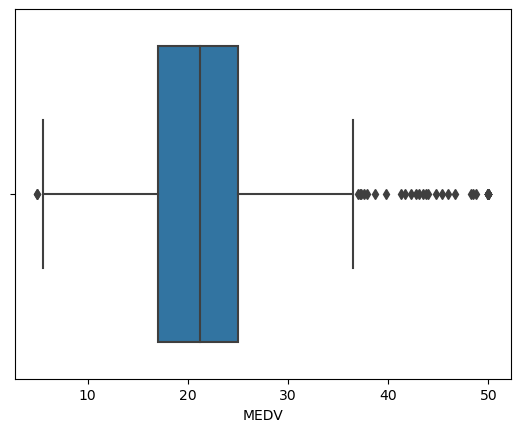

In [6]:
sns.boxplot(x=boston_df["MEDV"])

In [7]:
conteo = boston_df['CHAS'].value_counts()

<BarContainer object of 2 artists>

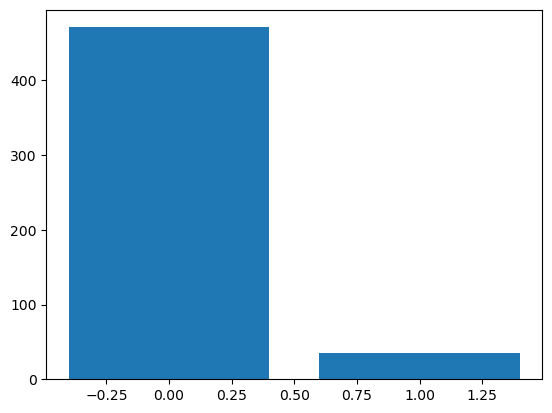

In [8]:
plt.bar(conteo.index, conteo) 

In [9]:
rango=pd.cut(boston_df['AGE'], bins=[0,35,70,101], labels=["Menor 35","35-70","mayor 70"])

In [10]:
boston_df.insert(1,"Categoria",rango)

In [11]:
boston_df.head()

,Unnamed: 0,Categoria,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,35-70,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,mayor 70,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,35-70,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,35-70,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,35-70,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Variable MEDV frente a la variable EDAD

<Axes: xlabel='Categoria', ylabel='MEDV'>

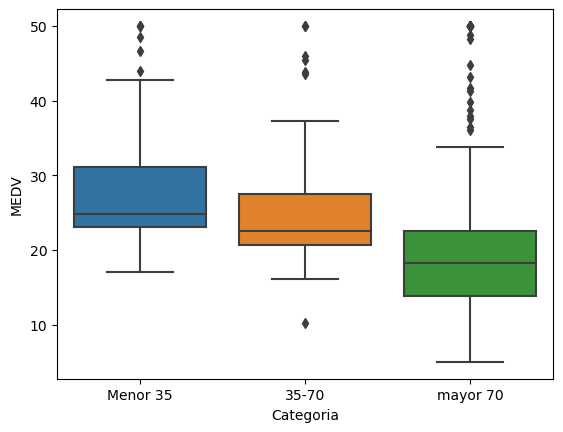

In [12]:
sns.boxplot(x=boston_df['Categoria'], y=boston_df['MEDV'])

concentraciones de óxido nítrico vs la proporción de acres comerciales no minoristas por ciudad

<Axes: xlabel='NOX', ylabel='INDUS'>

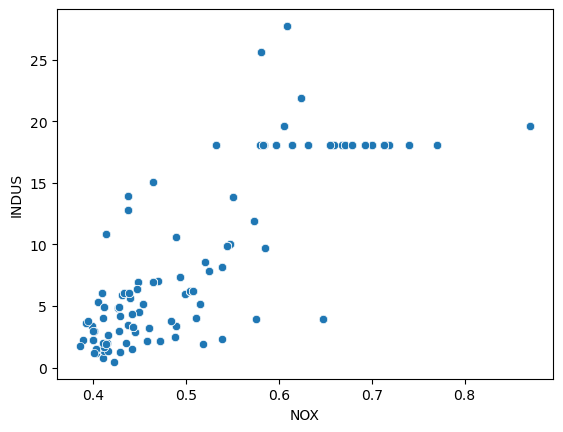

In [13]:
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])

Existe una relacion lineal entre ambas variables

Histograma de la variable

C:\Users\javier.mendez\AppData\Local\Temp\ipykernel_25096\3823237052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df['PTRATIO'], kde = False)


<Axes: xlabel='PTRATIO'>

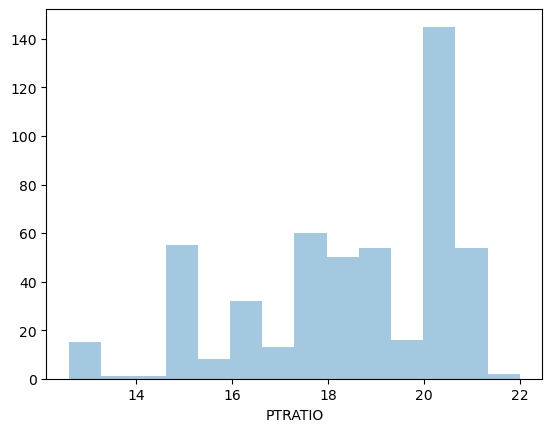

In [14]:
sns.distplot(boston_df['PTRATIO'], kde = False)

H0: El valor de las casas que colindan con rio es igual a las Casas que no colindan con rio vs Ha: El valor de las casas que colindan con rio es diferente a las Casas que no colindan con rio

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusión:** Dado que el valor p es menor que el valor alfa 0.05, rechazamos la hipótesis nula ya que hay pruebas suficientes de que existe una diferencia estadística esntra el valor de las casas que colindan con el rio.

Valor de la vivienda por edad
H0: El valor de la vivienda no depende de la edad vs Ha: El valor de la vivienda depende de la edad



In [16]:
model = ols('MEDV ~ AGE', data = boston_df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)             


                sum_sq     df          F        PR(>F)
AGE        6069.761065    1.0  83.477459  1.569982e-18
Residual  36646.534350  504.0        NaN           NaN


Conclusión: Dado que el valor p es inferior a 0.05, rechazaremos la hipótesis nula ya que existe evidencia significativa de que el valor de vivienda depende de la edad.

Correlación de Pearson

<Axes: xlabel='NOX', ylabel='INDUS'>

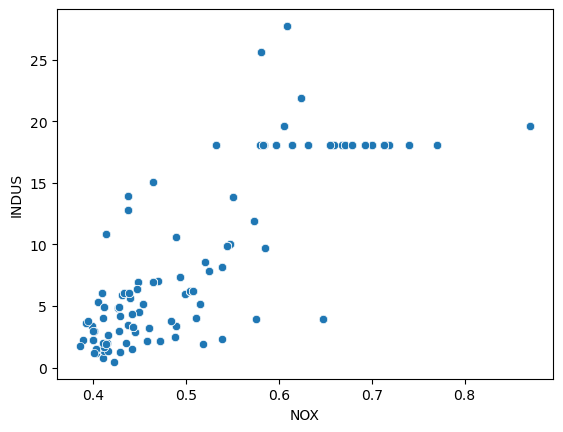

In [17]:
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"])

In [18]:
scipy.stats.pearsonr(x=boston_df["NOX"], y=boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061242812e-98)

Conclusión: Dado que el valor p < 0.05, rechazamos la hipótesis nula y concluimos que existe una relación entre óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

Analisis de regresión
H0: El valor de la vivienda no depende de la distancia a los centros de trabajo vs
    Ha: El valor de la vivienda depende de la distancia a los centros de trabajo


In [20]:
model = ols('MEDV ~ DIS', data = boston_df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)   

                sum_sq     df         F        PR(>F)
DIS        2668.246572    1.0  33.57957  1.206612e-08
Residual  40048.048843  504.0       NaN           NaN


Conclusión: Dado que el valor p es inferior a 0.05, rechazaremos la hipótesis nula ya que existe evidencia significativa de que el valor de vivienda depende de la distancia a los centros de trabajo.